In [128]:
from google.cloud import bigquery
from google.cloud.bigquery import job
import pandas as pd
import os
from tqdm import tqdm
import pandas as pd
PROJCECT = 'ballosodeuk'
bq = bigquery.Client(project=PROJCECT)
import statsmodels.api as sm 
import numpy as np

In [129]:
query_name = "1017_쿠폰구매데이터"
query_name = "1024_쇼핑구매자"


In [130]:
# 클라이언트 설정
client = bigquery.Client()

# SQL 파일 읽기
# file = './query/쿠팡0403_0509.sql'
file = f'../query/{query_name}.sql'
with open(file, 'r') as file:
    query = file.read()


In [131]:
job_config = bigquery.QueryJobConfig()
query_job = client.query(query, job_config=job_config)

In [62]:
df = query_job.to_dataframe()

c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


In [132]:
purchaseer = query_job.to_dataframe()

c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\google\cloud\bigquery\table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


In [133]:
df.to_parquet('./0503_1022_earningSpending.parquet')
purchaseer.to_parquet('./1018_1024_purchase.parquet')

In [2]:
df = pd.read_parquet('./0503_1022_earningSpending.parquet')

In [3]:
df.rename(columns={'9000-12999':'9000-10999'},inplace=True)
df.entropy.mean()


0.3487963132403713

In [4]:
df.columns

Index(['User_ID', 'Mean_Spend_Ratio', 'Interval_Days', 'entropy', '0-1000',
       '1000-2999', '3000-4999', '5000-6999', '7000-8999', '9000-10999',
       '11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999',
       '19000 - 20999', '21000 - 22999', '23000 - 24999', '25000 - 26999',
       '27000 - 28999', '29000 - 30999', '31000 - 32999', '33000 - 34999',
       '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -'],
      dtype='object')

- 통계치

In [5]:
def ci_stats(df,col):
    mean = df[col].mean()
    std = df[col].std()
    n = len(df)
    ci_upper = mean + 1.96 * std / np.sqrt(n)
    ci_lower = mean - 1.96 * std / np.sqrt(n)
    
    return round(mean,2), round(ci_upper,2), round(ci_lower,2)

spend_ratio = ci_stats(df,'Mean_Spend_Ratio')
entropy = ci_stats(df,'entropy')
Interval_Days = ci_stats(df,'Interval_Days')

print(spend_ratio, entropy, Interval_Days)

(0.68, 0.68, 0.68) (0.35, 0.35, 0.35) (10.02, 10.1, 9.94)


In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
tst = df[['Mean_Spend_Ratio','entropy']]

tst_scaled = sc.fit_transform(tst)
pd.DataFrame(tst_scaled).corr()

,0,1
0,1.000000,-0.073605
1,-0.073605,1.000000


In [7]:
df

,User_ID,Mean_Spend_Ratio,Interval_Days,entropy,0-1000,1000-2999,3000-4999,5000-6999,7000-8999,9000-10999,...,23000 - 24999,25000 - 26999,27000 - 28999,29000 - 30999,31000 - 32999,33000 - 34999,35000 - 36999,37000 - 38999,39000 - 40999,41000 -
0,39867749-164c-43cc-8433-4cc0daa17956,0.875367,11.00,0.00,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26e03ea0-f7d0-43a3-a00c-0268d48d66f1,0.000000,0.00,0.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1fe76913-af99-4177-98d4-1f6b0bef1dbf,0.694106,17.75,1.38,0,0,0,4,2,1,...,0,0,0,0,0,0,0,0,0,0
3,23cc23d1-e38a-4d11-854d-e005a88bd41f,1.000000,72.50,1.00,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,060764f0-51cf-468f-9029-84729dca69e8,0.890869,0.00,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163933,1059813e-9bd6-45ae-ba23-572bd604a39c,0.973611,0.00,0.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
163934,ff7556e4-88e7-4e2c-8247-f3084bc7d5f4,0.933672,0.00,0.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163935,d6103d4a-bd38-44e5-9ca1-bff3fc628fb3,0.451592,0.00,0.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
163936,84cfd59a-0b64-4b01-87e4-2c024d2b648b,0.626040,0.00,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 소비 강도의 증가에 따른 구매금액 범주 속할 확률 증가분

#### 1만원 이하 구매자의 경우, 탕진 확률이 낮다. 이상의 경우, 탕진 확률이 높다


#### 9월 소량 데이터
- print(np.exp(low_coef)) #1.1만원 이하 -> 강도 증가 시 0.14 배 낮아짐
- print(np.exp(low_mid)) #2.1만원 이하 -> 강도 증가 시 2.15배 높아짐
- print(np.exp(mid)) #3.1만원 이하 -> 강도 증가 시 12배 높아짐
- print(np.exp(high)) #4.1 만 이하, 이상 -> 강도 증가 시 30배 높아짐

#### 5~10월 전체 (16만명)
- 1.1만원 이하 : 강도 증가 시 0.04배 낮아짐
- 2.1만원 이하 : 강도 증가 시 1.78배 높아짐
- 3.1만원 이하 : 강도 증가 시 3.88배 높아짐
- 4.1만원 이하 : 강도 증가 시 15.4배 높아짐

>1. 따라서, 1.1만원 이하 구매의 경우 한탕 소진이 아니다. <br>
>2. 이 이상 높아질 시, 한탕 소진으로 모든 금액을 소진할 확률이 높다.
>3. 큰 쿠폰 구매자는 돈을 모아서 도달하고, 소액 쿠폰 구매는 잔액을 거의 대부분 남겨놓는 경향이 있다.
>4. 이 금액이 쇼핑지원금 타겟이다

In [8]:
def pre_prep(df):
    df['low'] = df[['0-1000', '1000-2999', '3000-4999', '5000-6999','7000-8999', '9000-10999', ]].sum(axis=1)
    df['low-mid'] = df[['11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999', '19000 - 20999']].sum(axis=1)
    df['mid'] = df[['21000 - 22999', '23000 - 24999', '25000 - 26999', '27000 - 28999','29000 - 30999']].sum(axis=1)
    df['high'] = df[['31000 - 32999', '33000 - 34999', '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -']].sum(axis=1)

    df_ = df[['User_ID','Mean_Spend_Ratio','low','low-mid','mid','high']].copy()
    df_ = df_[df_['Mean_Spend_Ratio'].notna()]
    df_ = df_.dropna(subset=['Mean_Spend_Ratio'])  # 결측값 제거
    df_ = df_[~df_['Mean_Spend_Ratio'].isin([float('inf'), -float('inf')])] 

    return df_

In [9]:
def logit_func(df_):
    X = df_['Mean_Spend_Ratio']
    y = df_.iloc[:,2:]
    y['low'] = y['low'].apply(lambda x : 1 if x > 1 else x)
    y['low-mid'] = y['low-mid'].apply(lambda x : 1 if x > 1 else x)
    y['mid'] = y['mid'].apply(lambda x : 1 if x > 1 else x)
    y['high'] = y['high'].apply(lambda x : 1 if x > 1 else x)

    results = {}
    for column in y.columns:
        y_column = y[column]
        X_with_const = sm.add_constant(X)
        model = sm.Logit(y_column, X_with_const).fit()
        results[column] = model.summary()

    return results


In [10]:
import pandas as pd
import numpy as np

def get_results(results):
    extracted_results = {}
    for column, summary in results.items():
        # summary.tables[1]에서 계수와 p-value 추출
        # 첫 번째 행은 상수항이므로, 두 번째 행부터 시작
        for i in range(1, len(summary.tables[1].data)):  # 첫 번째 행(상수항)을 제외하고 반복
            coef = summary.tables[1].data[i][1]  # 계수
            p_value = summary.tables[1].data[i][4]  # p-value
            variable_name = summary.tables[1].data[i][0]  # 변수 이름
            extracted_results[f"{column}_{variable_name}"] = {'coef': coef, 'p-value': p_value}        

    # DataFrame 생성
    df = pd.DataFrame(extracted_results).T

    # odds-ratio 계산
    def safe_exp(x):
        try:
            # x를 float로 변환
            float_x = float(x)
            return np.exp(float_x)  # exp 적용
        except (ValueError, TypeError):
            return np.nan  # 변환 불가능한 경우 NaN 반환

    df['odds-ratio'] = df['coef'].apply(safe_exp)
        
    return df

In [11]:
df_result = get_results(logit_func(pre_prep(df)))
df_result

Optimization terminated successfully.
         Current function value: 0.467152
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404493
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.186207
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.386204
         Iterations 7


,coef,p-value,odds-ratio
low_const,3.6992,0.000,40.414959
low_Mean_Spend_Ratio,-3.1532,0.000,0.042715
low-mid_const,-2.2111,0.000,0.109580
low-mid_Mean_Spend_Ratio,0.5770,0.000,1.780688
mid_const,-3.9946,0.000,0.018415
mid_Mean_Spend_Ratio,1.3496,0.000,3.855883
high_const,-3.8289,0.000,0.021734
high_Mean_Spend_Ratio,2.7194,0.000,15.171217


In [12]:
# 전체 5/3 ~ 10/22
df_result = get_results(logit_func(pre_prep(df)))
df_result

Optimization terminated successfully.
         Current function value: 0.467152
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.404493
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.186207
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.386204
         Iterations 7


,coef,p-value,odds-ratio
low_const,3.6992,0.000,40.414959
low_Mean_Spend_Ratio,-3.1532,0.000,0.042715
low-mid_const,-2.2111,0.000,0.109580
low-mid_Mean_Spend_Ratio,0.5770,0.000,1.780688
mid_const,-3.9946,0.000,0.018415
mid_Mean_Spend_Ratio,1.3496,0.000,3.855883
high_const,-3.8289,0.000,0.021734
high_Mean_Spend_Ratio,2.7194,0.000,15.171217


In [13]:
df = df[(df['Mean_Spend_Ratio']>0.0)]
len(df)
df_result = get_results(logit_func(pre_prep(df)))
df_result
#소비 이력 없는 유저 제외

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2885154061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['low'] = df[['0-1000', '1000-2999', '3000-4999', '5000-6999','7000-8999', '9000-10999', ]].sum(axis=1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2885154061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['low-mid'] = df[['11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999', '19000 - 20999']].sum(axis=1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2885154061.p

Optimization terminated successfully.
         Current function value: 0.488692
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.417896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.194043
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.402756
         Iterations 7


,coef,p-value,odds-ratio
low_const,3.5682,0.000,35.452721
low_Mean_Spend_Ratio,-3.0023,0.000,0.049673
low-mid_const,-1.8792,0.000,0.152712
low-mid_Mean_Spend_Ratio,0.1727,0.000,1.188509
mid_const,-3.7788,0.000,0.022850
mid_Mean_Spend_Ratio,1.0957,0.000,2.991276
high_const,-3.7263,0.000,0.024082
high_Mean_Spend_Ratio,2.6016,0.000,13.485297


### 엔트로피 구간 별 통계

In [14]:
df

,User_ID,Mean_Spend_Ratio,Interval_Days,entropy,0-1000,1000-2999,3000-4999,5000-6999,7000-8999,9000-10999,...,31000 - 32999,33000 - 34999,35000 - 36999,37000 - 38999,39000 - 40999,41000 -,low,low-mid,mid,high
0,39867749-164c-43cc-8433-4cc0daa17956,0.875367,11.00,0.00,0,2,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,1fe76913-af99-4177-98d4-1f6b0bef1dbf,0.694106,17.75,1.38,0,0,0,4,2,1,...,0,0,0,0,0,0,7,0,0,0
3,23cc23d1-e38a-4d11-854d-e005a88bd41f,1.000000,72.50,1.00,0,0,1,1,0,0,...,0,0,0,0,0,0,2,0,0,0
4,060764f0-51cf-468f-9029-84729dca69e8,0.890869,0.00,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,19570a6b-efd9-4273-8466-fa1192a32c89,0.638370,1.50,0.00,0,0,3,0,0,0,...,0,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163933,1059813e-9bd6-45ae-ba23-572bd604a39c,0.973611,0.00,0.00,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
163934,ff7556e4-88e7-4e2c-8247-f3084bc7d5f4,0.933672,0.00,0.00,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
163935,d6103d4a-bd38-44e5-9ca1-bff3fc628fb3,0.451592,0.00,0.00,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
163936,84cfd59a-0b64-4b01-87e4-2c024d2b648b,0.626040,0.00,0.00,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [15]:
df.entropy.min(), df.entropy.max(), df.Mean_Spend_Ratio.min(), df.Mean_Spend_Ratio.max()

(0.0, 3.23, 0.0015611827520529552, 1.0)

In [16]:
def entropy_pv(df):
    # entropy 구간 설정
    bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4]  # 구간 설정
    labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '1.0-1.2', 
            '1.2-1.4', '1.4-1.6', '1.6-1.8', '1.8-2.0', '2.0-2.2', '2.2-2.4',
            '2.4-2.6','2.6-2.8','2.8-3.0','3.0-3.2','3.2-3.4']  # 구간 레이블
    df['entropy_bins'] = pd.cut(df['entropy'], bins=bins, labels=labels, right=False)
    
    # 각 구간별 유저 수와 구매 횟수 집계
    result = df.groupby('entropy_bins').agg(
        user_count=('User_ID', 'nunique'),  # 유저 수
        Mean_Spend_Ratio=('Mean_Spend_Ratio','mean'),
        Interval_Days=('Interval_Days','mean'),
        low=('low', 'sum'),  # 총 구매 횟수
        low_mid=('low-mid', 'sum'),  # 총 구매 횟수
        mid=('mid', 'sum'),  # 총 구매 횟수
        high=('high', 'sum'),  # 총 구매 횟수
    ).reset_index()

    # 결과 출력
    return pd.DataFrame(result)

entropy_pv(df)

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\4038178648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entropy_bins'] = pd.cut(df['entropy'], bins=bins, labels=labels, right=False)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\4038178648.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('entropy_bins').agg(


,entropy_bins,user_count,Mean_Spend_Ratio,Interval_Days,low,low_mid,mid,high
0,0-0.2,93359,0.743405,4.824369,124675,10823,4217,16982
1,0.2-0.4,134,0.546698,12.343057,2204,5,1,22
2,0.4-0.6,1112,0.577335,18.559463,9771,53,9,29
3,0.6-0.8,2227,0.599471,22.396495,13120,228,34,78
4,0.8-1.0,14301,0.644952,23.523977,50067,3004,491,925
5,1.0-1.2,20516,0.684742,21.292003,36448,6089,1615,3246
6,1.2-1.4,1768,0.577453,23.222124,10633,396,65,116
7,1.4-1.6,8723,0.637908,25.644822,29179,3692,678,995
8,1.6-1.8,378,0.533755,20.822334,2718,140,27,40
9,1.8-2.0,1004,0.572844,24.296755,5349,534,69,107


In [25]:
def spend_power_pv(df):

    # df = df[~df['Mean_Spend_Ratio'].isna()]
    df['spend_cnt'] = df.iloc[:,-6:-2].sum(axis=1)

    # entropy 구간 설정
    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0]  # 구간 설정
    labels = [
        '0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5',
        '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0'
        ]  # 구간 레이블
    df['spend_power_bins'] = pd.cut(df['Mean_Spend_Ratio'], bins=bins, labels=labels, right=True)

    # 각 구간별 유저 수와 구매 횟수 집계
    result = df.groupby('spend_power_bins').agg(
        user_count=('User_ID', 'nunique'),  # 유저 수
        entropy=('entropy','mean'),
        Interval_Days=('Interval_Days','mean'),
        total_counts=('spend_cnt','sum'),
        low=('low', 'sum'),  # 총 구매 횟수
        low_mid=('low-mid', 'sum'),  # 총 구매 횟수
        mid=('mid', 'sum'),  # 총 구매 횟수
        high=('high', 'sum'),  # 총 구매 횟수
    ).reset_index()

    # 결과 출력
    return(pd.DataFrame(result))

spend_power_pv(df)

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\579257319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spend_cnt'] = df.iloc[:,-6:-2].sum(axis=1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\579257319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spend_power_bins'] = pd.cut(df['Mean_Spend_Ratio'], bins=bins, labels=labels, right=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\579257319.py:15: FutureWarning: The default of observed=False is deprecated and will be changed 

,spend_power_bins,user_count,entropy,Interval_Days,total_counts,low,low_mid,mid,high
0,0-0.1,2545,0.267796,9.096764,5876,5785,69,7,34
1,0.1-0.2,5927,0.377442,10.993121,16249,15822,341,43,78
2,0.2-0.3,6814,0.484538,12.603553,20122,18845,1045,137,231
3,0.3-0.4,8207,0.562041,13.974242,25111,22892,1673,345,498
4,0.4-0.5,10140,0.625748,15.293377,29507,26303,2249,541,1254
5,0.5-0.6,11518,0.551206,14.053452,32491,28866,2591,614,1387
6,0.6-0.7,13526,0.494806,14.254714,36564,32286,3013,717,1704
7,0.7-0.8,16296,0.403213,13.611379,39724,34809,3330,833,2294
8,0.8-0.9,20321,0.345520,12.071779,42754,36599,3737,1181,3548
9,0.9-1.0,49231,0.248970,7.160654,81473,66115,7690,2951,11729


In [18]:
a = df[(df['Mean_Spend_Ratio']<=0.0) & (df['Mean_Spend_Ratio']<=0.1)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.1) & (df['Mean_Spend_Ratio']<=0.2)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.2) & (df['Mean_Spend_Ratio']<=0.3)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.3) & (df['Mean_Spend_Ratio']<=0.4)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.4) & (df['Mean_Spend_Ratio']<=0.5)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.5) & (df['Mean_Spend_Ratio']<=0.6)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.6) & (df['Mean_Spend_Ratio']<=0.7)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.7) & (df['Mean_Spend_Ratio']<=0.8)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.8) & (df['Mean_Spend_Ratio']<=0.9)].User_ID.nunique()
a += df[(df['Mean_Spend_Ratio']>0.9) & (df['Mean_Spend_Ratio']<=1.0)].User_ID.nunique()
print(a)

141980


In [28]:
df.head(1)

,User_ID,Mean_Spend_Ratio,Interval_Days,entropy,0-1000,1000-2999,3000-4999,5000-6999,7000-8999,9000-10999,...,37000 - 38999,39000 - 40999,41000 -,low,low-mid,mid,high,entropy_bins,spend_cnt,spend_power_bins
0,39867749-164c-43cc-8433-4cc0daa17956,0.875367,11.0,0.0,0,2,0,0,0,0,...,0,0,0,2,0,0,0,0-0.2,2,0.8-0.9


In [39]:
df.iloc[:,4:-7].columns
# df.head(1)

Index(['0-1000', '1000-2999', '3000-4999', '5000-6999', '7000-8999',
       '9000-10999', '11000 - 12999', '13000 - 14999', '15000 - 16999',
       '17000 - 18999', '19000 - 20999', '21000 - 22999', '23000 - 24999',
       '25000 - 26999', '27000 - 28999', '29000 - 30999', '31000 - 32999',
       '33000 - 34999', '35000 - 36999', '37000 - 38999', '39000 - 40999',
       '41000 -'],
      dtype='object')

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Mean_Spend_Ratio', hue='spend_power_bins')


ValueError: Could not interpret value `Mean_Spend_Ratio` for parameter `x`

<Figure size 1000x600 with 0 Axes>

c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Owner\miniconda3\envs\pymc\lib\site-package

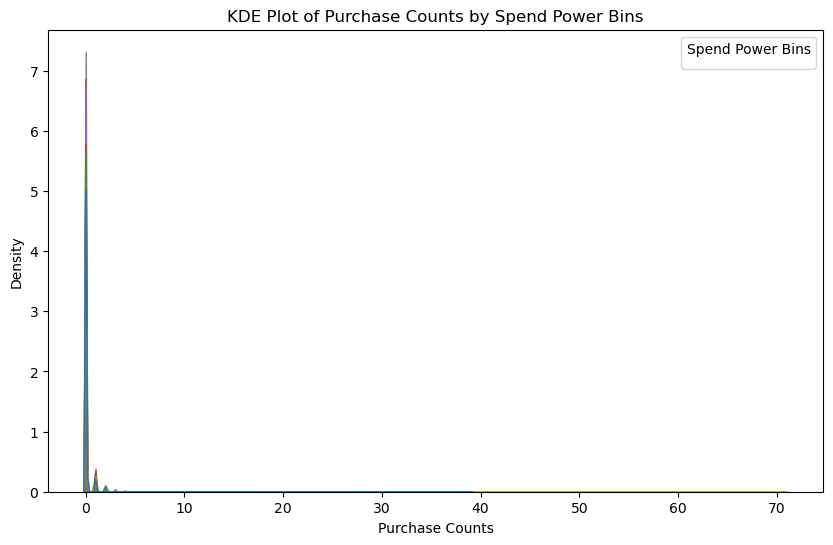

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 spend_power_bins 구간 별 각 가격대 구매 횟수 분포를 위해 데이터 변환
melted_df = df.iloc[:, 4:-7].melt(var_name='price_range', value_name='purchase_counts', ignore_index=False)
melted_df['spend_power_bins'] = df['spend_power_bins']  # spend_power_bins 추가

plt.figure(figsize=(10, 6))
sns.kdeplot(data=melted_df, x='purchase_counts', hue='spend_power_bins', common_norm=False, fill=True)

# 플롯 설정
plt.title('KDE Plot of Purchase Counts by Spend Power Bins')
plt.xlabel('Purchase Counts')
plt.ylabel('Density')
plt.legend(title='Spend Power Bins')
plt.show()

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 가격대와 유저 별 구매 횟수를 긴 형식으로 변환
melted_df = df.iloc[:, 4:-7].melt(var_name='price_range', value_name='purchase_counts', ignore_index=False)
melted_df['spend_power_bins'] = df['spend_power_bins']  # spend_power_bins 추가

# 스캐터 플롯 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_df, x='price_range', y='purchase_counts', hue='spend_power_bins', alpha=0.7)

# 플롯 설정
plt.title('Scatter Plot of Purchase Counts by Price Range and Spend Power Bins')
plt.xlabel('Price Range')
plt.ylabel('Purchase Counts')
plt.legend(title='Spend Power Bins')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

,price_range,purchase_counts,spend_power_bins
0,0-1000,0,0.8-0.9
2,0-1000,0,0.6-0.7
3,0-1000,0,0.9-1.0
4,0-1000,0,0.8-0.9
5,0-1000,0,0.6-0.7
...,...,...,...
163933,41000 -,0,0.9-1.0
163934,41000 -,0,0.9-1.0
163935,41000 -,0,0.4-0.5
163936,41000 -,0,0.6-0.7


In [64]:
df.iloc[:, 4:-7].columns

Index(['0-1000', '1000-2999', '3000-4999', '5000-6999', '7000-8999',
       '9000-10999', '11000 - 12999', '13000 - 14999', '15000 - 16999',
       '17000 - 18999', '19000 - 20999', '21000 - 22999', '23000 - 24999',
       '25000 - 26999', '27000 - 28999', '29000 - 30999', '31000 - 32999',
       '33000 - 34999', '35000 - 36999', '37000 - 38999', '39000 - 40999',
       '41000 -'],
      dtype='object')

In [67]:
tst

,a_0_1000,a_1000_2999,a_3000_4999,a_5000_6999,a_7000_8999,a_9000_10999,a_11000_12999,a_13000_14999,a_15000_16999,a_17000_18999,...,a_23000_24999,a_25000_26999,a_27000_28999,a_29000_30999,a_31000_32999,a_33000_34999,a_35000_36999,a_37000_38999,a_39000_40999,a_41000
spend_power_bins,,,,,,,,,,,,,,,,,,,,,
0-0.1,910,3555,780,362,118,60,24,27,10,3,...,1,3,1,0,4,3,4,8,0,15
0.1-0.2,1101,7313,3029,2853,918,608,79,206,32,12,...,6,13,3,1,12,4,5,12,2,43
0.2-0.3,1471,7361,3333,4020,1348,1312,287,575,93,56,...,31,36,16,5,36,19,31,48,2,95
0.3-0.4,1732,8494,3913,5122,1827,1804,440,898,143,93,...,55,91,66,5,111,57,45,79,5,201
0.4-0.5,2691,8994,4408,5873,2002,2335,590,1129,223,142,...,91,168,94,19,318,140,156,215,11,414
0.5-0.6,1401,10415,4967,7033,2442,2608,723,1320,240,139,...,124,186,102,20,356,145,219,232,15,420
0.6-0.7,1060,11748,5507,7936,2815,3220,851,1505,282,186,...,143,222,116,19,385,211,230,310,20,548
0.7-0.8,715,13114,5685,8802,3105,3388,951,1648,323,202,...,173,217,175,16,496,232,360,422,32,752
0.8-0.9,687,13446,5847,9432,3425,3762,1118,1763,407,236,...,258,378,183,46,742,379,521,619,50,1237


In [66]:
tst = df.groupby('spend_power_bins').agg(
    a_0_1000 = ('0-1000','sum'),
    a_1000_2999 = ('1000-2999','sum'),
    a_3000_4999 = ('3000-4999','sum'),
    a_5000_6999 = ('5000-6999','sum'),
    a_7000_8999 = ('7000-8999','sum'),
    a_9000_10999 = ('9000-10999','sum'),
    a_11000_12999 = ('11000 - 12999','sum'),
    a_13000_14999 = ('13000 - 14999','sum'),
    a_15000_16999 = ('15000 - 16999','sum'),
    a_17000_18999 = ('17000 - 18999','sum'),
    a_19000_20999 = ('19000 - 20999','sum'),
    a_21000_22999 = ('21000 - 22999','sum'),
    a_23000_24999 = ('23000 - 24999','sum'),
    a_25000_26999 = ('25000 - 26999','sum'),
    a_27000_28999 = ('27000 - 28999','sum'),
    a_29000_30999 = ('29000 - 30999','sum'),
    a_31000_32999 = ('31000 - 32999','sum'),
    a_33000_34999 = ('33000 - 34999','sum'),
    a_35000_36999 = ('35000 - 36999','sum'),
    a_37000_38999 = ('37000 - 38999','sum'),
    a_39000_40999 = ('39000 - 40999','sum'),
    a_41000 = ('41000 -','sum'),
)

tst.melt(id_vars='spend_power_bins',var_name=)

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\458791576.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tst = df.groupby('spend_power_bins').agg(


C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\3848912180.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tst = df.groupby('spend_power_bins').agg(


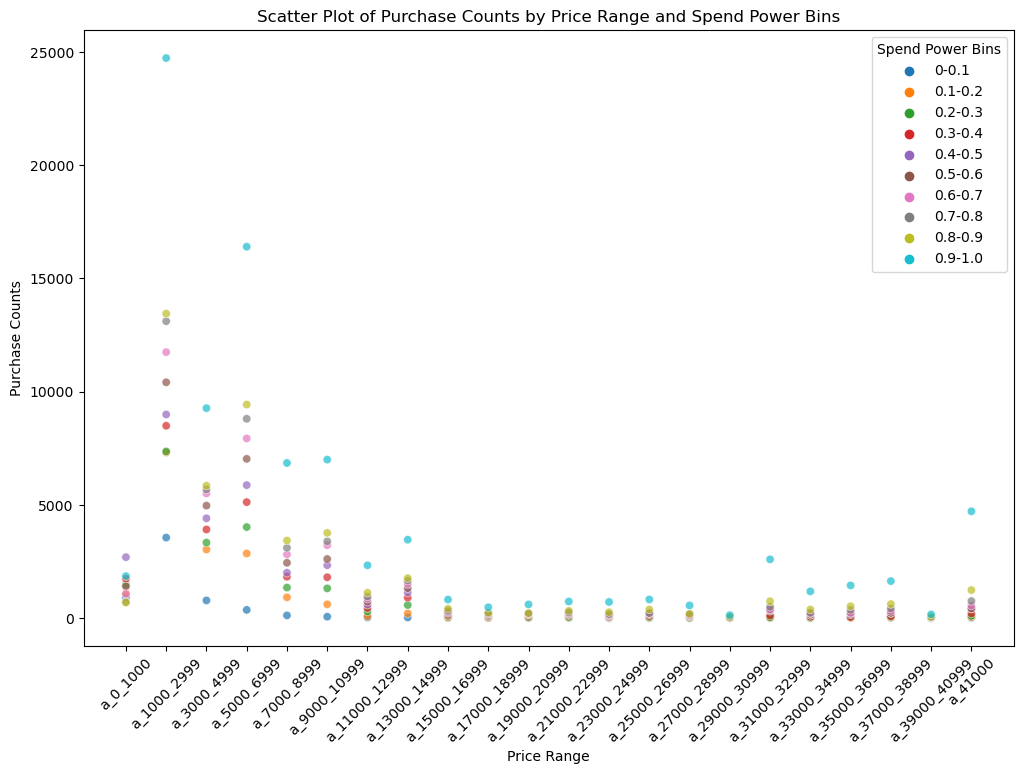

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 그룹화 및 집계
tst = df.groupby('spend_power_bins').agg(
    a_0_1000=('0-1000', 'sum'),
    a_1000_2999=('1000-2999', 'sum'),
    a_3000_4999=('3000-4999', 'sum'),
    a_5000_6999=('5000-6999', 'sum'),
    a_7000_8999=('7000-8999', 'sum'),
    a_9000_10999=('9000-10999', 'sum'),
    a_11000_12999=('11000 - 12999', 'sum'),
    a_13000_14999=('13000 - 14999', 'sum'),
    a_15000_16999=('15000 - 16999', 'sum'),
    a_17000_18999=('17000 - 18999', 'sum'),
    a_19000_20999=('19000 - 20999', 'sum'),
    a_21000_22999=('21000 - 22999', 'sum'),
    a_23000_24999=('23000 - 24999', 'sum'),
    a_25000_26999=('25000 - 26999', 'sum'),
    a_27000_28999=('27000 - 28999', 'sum'),
    a_29000_30999=('29000 - 30999', 'sum'),
    a_31000_32999=('31000 - 32999', 'sum'),
    a_33000_34999=('33000 - 34999', 'sum'),
    a_35000_36999=('35000 - 36999', 'sum'),
    a_37000_38999=('37000 - 38999', 'sum'),
    a_39000_40999=('39000 - 40999', 'sum'),
    a_41000=('41000 -', 'sum'),
).reset_index()

# 긴 형식으로 변환
melted_tst = tst.melt(id_vars='spend_power_bins', var_name='price_range', value_name='purchase_counts')

# 스캐터 플롯 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_tst, x='price_range', y='purchase_counts', hue='spend_power_bins', alpha=0.7)

# 플롯 설정
plt.title('Scatter Plot of Purchase Counts by Price Range and Spend Power Bins')
plt.xlabel('Price Range')
plt.ylabel('Purchase Counts')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Spend Power Bins')
plt.show()

In [69]:
melted_tst

,spend_power_bins,price_range,purchase_counts
0,0-0.1,a_0_1000,910
1,0.1-0.2,a_0_1000,1101
2,0.2-0.3,a_0_1000,1471
3,0.3-0.4,a_0_1000,1732
4,0.4-0.5,a_0_1000,2691
...,...,...,...
215,0.5-0.6,a_41000,420
216,0.6-0.7,a_41000,548
217,0.7-0.8,a_41000,752
218,0.8-0.9,a_41000,1237


C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\1941847732.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tst = df.groupby('spend_power_bins').agg(


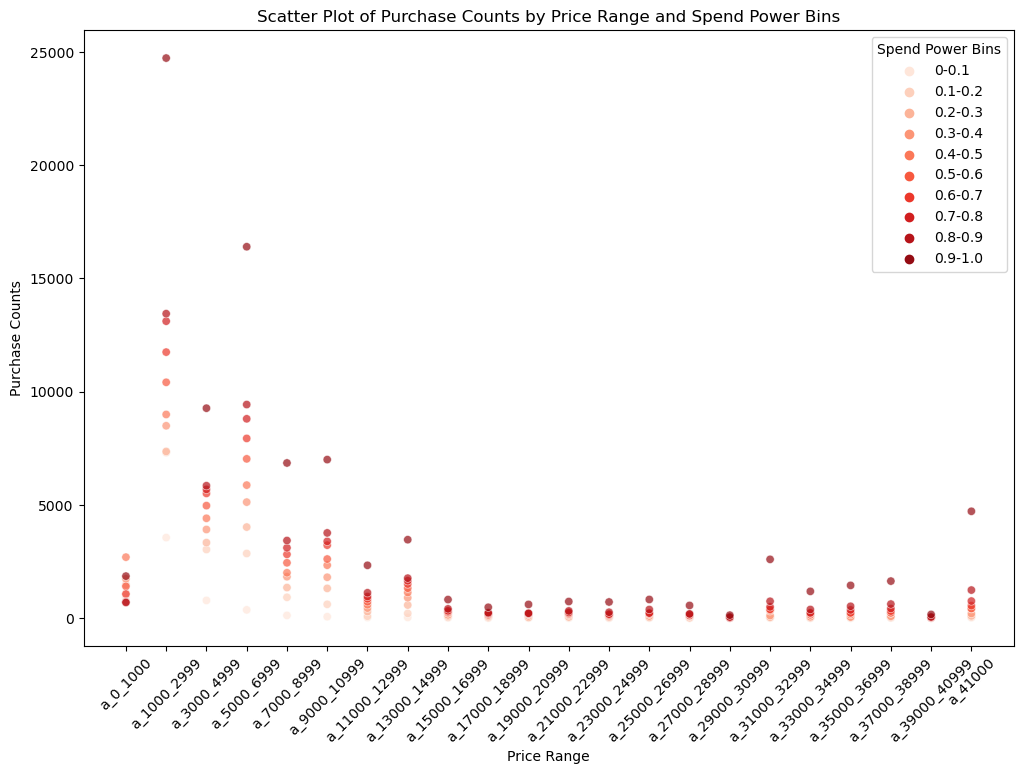

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 그룹화 및 집계
tst = df.groupby('spend_power_bins').agg(
    a_0_1000=('0-1000', 'sum'),
    a_1000_2999=('1000-2999', 'sum'),
    a_3000_4999=('3000-4999', 'sum'),
    a_5000_6999=('5000-6999', 'sum'),
    a_7000_8999=('7000-8999', 'sum'),
    a_9000_10999=('9000-10999', 'sum'),
    a_11000_12999=('11000 - 12999', 'sum'),
    a_13000_14999=('13000 - 14999', 'sum'),
    a_15000_16999=('15000 - 16999', 'sum'),
    a_17000_18999=('17000 - 18999', 'sum'),
    a_19000_20999=('19000 - 20999', 'sum'),
    a_21000_22999=('21000 - 22999', 'sum'),
    a_23000_24999=('23000 - 24999', 'sum'),
    a_25000_26999=('25000 - 26999', 'sum'),
    a_27000_28999=('27000 - 28999', 'sum'),
    a_29000_30999=('29000 - 30999', 'sum'),
    a_31000_32999=('31000 - 32999', 'sum'),
    a_33000_34999=('33000 - 34999', 'sum'),
    a_35000_36999=('35000 - 36999', 'sum'),
    a_37000_38999=('37000 - 38999', 'sum'),
    a_39000_40999=('39000 - 40999', 'sum'),
    a_41000=('41000 -', 'sum'),
).reset_index()

# 긴 형식으로 변환
melted_tst = tst.melt(id_vars='spend_power_bins', var_name='price_range', value_name='purchase_counts')

# spend_power_bins의 강도에 따라 색상 매핑
# spend_power_bins의 고유 값에 따라 색상 맵 생성
unique_bins = melted_tst['spend_power_bins'].unique()
colors = sns.color_palette("Reds", len(unique_bins))  # 연한 분홍에서 진한 빨강으로 색상 생성
color_map = dict(zip(unique_bins, colors))

# 스캐터 플롯 그리기
plt.figure(figsize=(12, 8))
sns.scatterplot(data=melted_tst, x='price_range', y='purchase_counts', 
                hue='spend_power_bins', palette=color_map, alpha=0.7)

# 플롯 설정
plt.title('Scatter Plot of Purchase Counts by Price Range and Spend Power Bins')
plt.xlabel('Price Range')
plt.ylabel('Purchase Counts')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='Spend Power Bins')
plt.show()

In [83]:
tst

,spend_power_bins,a_0_1000,a_1000_2999,a_3000_4999,a_5000_6999,a_7000_8999,a_9000_10999,a_11000_12999,a_13000_14999,a_15000_16999,...,a_23000_24999,a_25000_26999,a_27000_28999,a_29000_30999,a_31000_32999,a_33000_34999,a_35000_36999,a_37000_38999,a_39000_40999,a_41000
0,0-0.1,910,3555,780,362,118,60,24,27,10,...,1,3,1,0,4,3,4,8,0,15
1,0.1-0.2,1101,7313,3029,2853,918,608,79,206,32,...,6,13,3,1,12,4,5,12,2,43
2,0.2-0.3,1471,7361,3333,4020,1348,1312,287,575,93,...,31,36,16,5,36,19,31,48,2,95
3,0.3-0.4,1732,8494,3913,5122,1827,1804,440,898,143,...,55,91,66,5,111,57,45,79,5,201
4,0.4-0.5,2691,8994,4408,5873,2002,2335,590,1129,223,...,91,168,94,19,318,140,156,215,11,414
5,0.5-0.6,1401,10415,4967,7033,2442,2608,723,1320,240,...,124,186,102,20,356,145,219,232,15,420
6,0.6-0.7,1060,11748,5507,7936,2815,3220,851,1505,282,...,143,222,116,19,385,211,230,310,20,548
7,0.7-0.8,715,13114,5685,8802,3105,3388,951,1648,323,...,173,217,175,16,496,232,360,422,32,752
8,0.8-0.9,687,13446,5847,9432,3425,3762,1118,1763,407,...,258,378,183,46,742,379,521,619,50,1237
9,0.9-1.0,1853,24737,9271,16403,6851,7000,2331,3462,817,...,711,822,558,129,2594,1180,1444,1633,161,4717


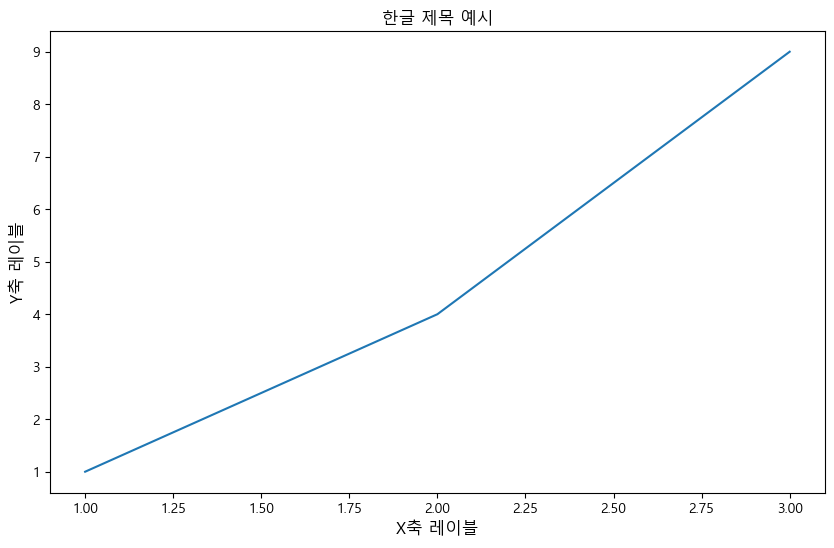

In [116]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12)

# 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 한글이 포함된 플롯 예시
plt.figure(figsize=(10, 6))
plt.title('한글 제목 예시', fontproperties=font_prop)
plt.xlabel('X축 레이블', fontproperties=font_prop)
plt.ylabel('Y축 레이블', fontproperties=font_prop)
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2267881721.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spend_power_bins'] = df['spend_power_bins'].astype(str)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2267881721.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_spend_power'] = df['spend_power_bins'].apply(calculate_average)
C:\Users\Owner\AppData\Local\Temp\ipykernel_31080\2267881721.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

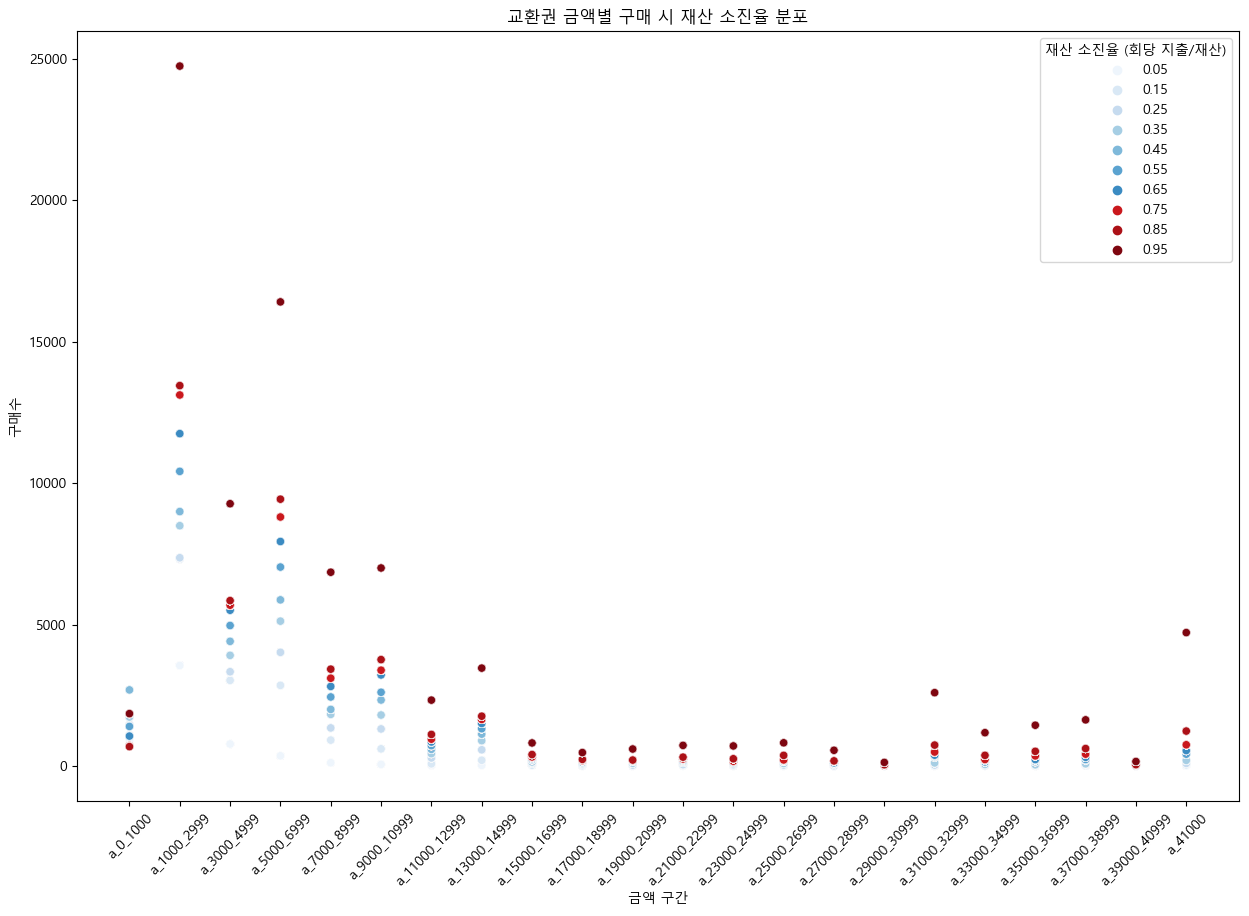

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# spend_power_bins 열에서 평균값 계산하여 새로운 열 생성
def calculate_average(bin_str):
    lower, upper = map(float, bin_str.split('-'))  # '-'로 분리하여 float로 변환
    return round((lower + upper) / 2,2)  # 평균 계산

# 새로운 열 추가
df['spend_power_bins'] = df['spend_power_bins'].astype(str)
df['average_spend_power'] = df['spend_power_bins'].apply(calculate_average)

# 0.6 이하인지 여부로 분류하는 새로운 열 추가
df['is_below_0.6'] = df['average_spend_power'] <= 0.65

# 긴 형식으로 변환
melted_tst = tst.melt(id_vars='spend_power_bins', var_name='price_range', value_name='purchase_counts')

# df와 melted_tst를 merge하여 average_spend_power 추가
melted_tst = melted_tst.merge(df[['spend_power_bins', 'average_spend_power']], on='spend_power_bins', how='left')

# spend_power_bins의 강도에 따라 색상 매핑
# average_spend_power의 고유 값에 따라 색상 맵 생성
unique_bins = melted_tst['average_spend_power'].unique()

# 색상 맵 생성
colors = []
for bin in unique_bins:
    if bin <= 0.65:
        # 푸른 계열 색상 (낮을수록 연하고 높을수록 진한)
        color = sns.color_palette("Blues", as_cmap=True)(bin)
    else:
        # 빨간 계열 색상 (낮을수록 연하고 높을수록 진한)
        color = sns.color_palette("Reds", as_cmap=True)(bin)
    colors.append(color)

# 색상 매핑 딕셔너리 생성
color_map = dict(zip(unique_bins, colors))

# 스캐터 플롯 그리기
plt.figure(figsize=(15, 10))
sns.scatterplot(data=melted_tst, x='price_range', y='purchase_counts', 
                hue='average_spend_power', palette=color_map, alpha=0.7)

# 플롯 설정
plt.title('교환권 금액별 구매 시 재산 소진율 분포')
plt.xlabel('금액 구간')
plt.ylabel('구매수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend(title='재산 소진율 (회당 지출/재산)')
plt.show()

In [134]:
purchaseer

,User_ID,Rev,Cnt
0,a841cb73-06d6-4728-b0e0-e2b70e0414fe,9900.0,1
1,e9570526-cbaa-4594-8224-f859d256e0fb,6900.0,1
2,f60bd369-7109-4710-91cc-a0d0d938e693,29900.0,1
3,28fcba61-2a32-44ab-ac6e-5345823d8e31,94700.0,3
4,769240dd-50c2-4195-a257-c08f8843544f,157800.0,2
...,...,...,...
434,843bd081-9bfd-4842-b4e7-d9706ad455cc,10400.0,1
435,6fa34135-8802-4728-9508-4f28f73a2cf3,13800.0,1
436,f95843dd-7f28-451c-ac35-193798dda049,13500.0,3
437,41f48e51-e612-42ce-86ca-036b5032b9e4,41300.0,3


In [137]:
df.columns

Index(['User_ID', 'Mean_Spend_Ratio', 'Interval_Days', 'entropy', '0-1000',
       '1000-2999', '3000-4999', '5000-6999', '7000-8999', '9000-10999',
       '11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999',
       '19000 - 20999', '21000 - 22999', '23000 - 24999', '25000 - 26999',
       '27000 - 28999', '29000 - 30999', '31000 - 32999', '33000 - 34999',
       '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -', 'low',
       'low-mid', 'mid', 'high', 'entropy_bins', 'spend_cnt',
       'spend_power_bins', 'average_spend_power', 'is_below_0.6'],
      dtype='object')

In [139]:
ddd = pd.merge(purchaseer,df,how='left',left_on='User_ID',right_on='User_ID')

In [147]:
len(ddd[ddd['entropy'].isna()]), len(ddd[~ddd['entropy'].isna()])

(252, 187)

In [151]:
df.columns

Index(['User_ID', 'Mean_Spend_Ratio', 'Interval_Days', 'entropy', '0-1000',
       '1000-2999', '3000-4999', '5000-6999', '7000-8999', '9000-10999',
       '11000 - 12999', '13000 - 14999', '15000 - 16999', '17000 - 18999',
       '19000 - 20999', '21000 - 22999', '23000 - 24999', '25000 - 26999',
       '27000 - 28999', '29000 - 30999', '31000 - 32999', '33000 - 34999',
       '35000 - 36999', '37000 - 38999', '39000 - 40999', '41000 -', 'low',
       'low-mid', 'mid', 'high', 'entropy_bins', 'spend_cnt',
       'spend_power_bins', 'average_spend_power', 'is_below_0.6'],
      dtype='object')

In [154]:
ddd.groupby('spend_power_bins').agg(
    user_id=('User_ID','count'),
    low = ('low','sum'),
    low_mid = ('low-mid','sum'), 
    mid = ('mid','sum'), 
    high = ('high','sum'),
    spend_cnt=('spend_cnt','sum'),
    rev=('Rev','sum'),
    rev_c=('Rev','count'),
    )

,user_id,low,low_mid,mid,high,spend_cnt,rev,rev_c
spend_power_bins,,,,,,,,
0-0.1,12,22,0,0,0,22,377700.0,12
0.1-0.2,31,58,6,1,19,82,992900.0,31
0.2-0.3,16,36,3,1,1,40,1170100.0,16
0.3-0.4,14,42,2,1,2,45,429780.0,14
0.4-0.5,14,51,3,0,1,54,344900.0,14
0.5-0.6,19,47,1,1,3,49,740280.0,19
0.6-0.7,21,41,8,1,5,55,1821500.0,21
0.7-0.8,12,18,2,2,2,22,307200.0,12
0.8-0.9,19,35,2,4,3,41,531500.0,19
